# Proyek Analisis Data: Brazilian E-Commerce by Olist
- Nama: Aditya Setyo Budi
- Email: adityasetyo7@gmail.com
- Id Dicoding: aditya_sb

## Menentukan Pertanyaan Bisnis

- Berapa total pendapatan penjualan selama periode dataset ini (2016-2018) ?
- Kota mana yang paling banyak Customer bertransaksi?
- Dapatkah kita mengidentifikasi penjual atau toko mana yang paling banyak menerima pesanan?
- Bagaimana perkembangan jumlah pesanan selama setiap bulan dalam dataset ini ?
- Bagaimana korelasi antara waktu pengiriman perkiraan dengan tingkat kepuasan pelanggan ?
- Dapatkah kita mengidentifikasi produk teratas yang paling sering dibeli oleh pelanggan?
- Berapa persentase customer dalam melakukan metode pembayaran ?
-  top 10 kota paling tinggi revenue ?
- Rata - Rata review score atau ulasan pada product dan kategori product ?
- RFM Analysis ?


## Menyaipkan semua library yang dibuthkan

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="darkgrid")

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [2]:
# load data dari google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Data Wrangling

### Gathering Data

In [109]:
# customers_dataset
customers_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/customers_dataset.csv')
customers_dataset.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
#geolocation_dataset
geolocation_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/geolocation_dataset.csv')
geolocation_dataset.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
#order_items_dataset
order_items_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/order_items_dataset.csv')
order_items_dataset.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
#order_payments_dataset
order_payments_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/order_payments_dataset.csv')
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
#order_reviews_dataset
order_reviews_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/order_reviews_dataset.csv')
order_reviews_dataset.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
#orders_dataset
orders_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/orders_dataset.csv')
orders_dataset.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
#products_dataset
products_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/products_dataset.csv')
products_dataset.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
#sellers_dataset
sellers_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/sellers_dataset.csv')
sellers_dataset.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
# product_category_name_translation
product_category_name_translation = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/E-Commerce Public Dataset/Data/product_category_name_translation.csv')
product_category_name_translation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


### Assessing Data

##### customer_dataset

In [12]:
# cek customers_dataset info dan cek missing value
customers_dataset.info()
print("-" * 50)
print(customers_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
--------------------------------------------------
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


In [13]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", customers_dataset.duplicated().sum())
customers_dataset.describe(include='all')

Jumlah duplikasi 0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35137.474583,NaN,NaN
std,NaN,NaN,29797.938996,NaN,NaN
min,NaN,NaN,1003.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [14]:
# mengganti nama kolom customer_zip_code_prefix dengan zip_code_prefix
customers_dataset.rename(columns={'customer_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

##### geolocation_dataset

In [15]:
# cek geolocation_dataset info dan cek missing value
geolocation_dataset.info()
print("-" * 50)
print(geolocation_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB
--------------------------------------------------
geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


In [16]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", geolocation_dataset.duplicated().sum())
geolocation_dataset.describe(include='all')

Jumlah duplikasi 261831


,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
count,1.000163e+06,1.000163e+06,1.000163e+06,1000163,1000163
unique,NaN,NaN,NaN,8011,27
top,NaN,NaN,NaN,sao paulo,SP
freq,NaN,NaN,NaN,135800,404268
mean,3.657417e+04,-2.117615e+01,-4.639054e+01,NaN,NaN
std,3.054934e+04,5.715866e+00,4.269748e+00,NaN,NaN
min,1.001000e+03,-3.660537e+01,-1.014668e+02,NaN,NaN
25%,1.107500e+04,-2.360355e+01,-4.857317e+01,NaN,NaN
50%,2.653000e+04,-2.291938e+01,-4.663788e+01,NaN,NaN
75%,6.350400e+04,-1.997962e+01,-4.376771e+01,NaN,NaN


In [17]:
# mengganti nama kolom geolocation_zip_code_prefix dengan zip_code_prefix
geolocation_dataset.rename(columns={'geolocation_zip_code_prefix': 'zip_code_prefix'}, inplace=True)

##### order_items_dataset

In [18]:
# cek order_items_dataset info dan cek missing value
order_items_dataset.info()
print("-" * 50)
print(order_items_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
--------------------------------------------------
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


In [19]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", order_items_dataset.duplicated().sum())
order_items_dataset.describe(include='all')

Jumlah duplikasi 0


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000
50%,NaN,1.000000,NaN,NaN,NaN,74.990000,16.260000
75%,NaN,1.000000,NaN,NaN,NaN,134.900000,21.150000


##### order_payments_dataset

In [20]:
# cek order_payments_dataset info dan cek missing value
order_payments_dataset.info()
print("-" * 50)
print(order_payments_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB
--------------------------------------------------
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


In [21]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", order_payments_dataset.duplicated().sum())
order_payments_dataset.describe(include='all')

Jumlah duplikasi 0


,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


##### order_reviews_dataset

In [22]:
# cek order_reviews_dataset info dan cek missing value
order_reviews_dataset.info()
print("-" * 50)
print(order_reviews_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB
--------------------------------------------------
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64


In [23]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", order_reviews_dataset.duplicated().sum())
order_reviews_dataset.describe(include='all')

Jumlah duplikasi 0


,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
count,99224,99224,99224.000000,11568,40977,99224,99224
unique,98410,98673,NaN,4527,36159,636,98248
top,7b606b0d57b078384f0b58eac1d41d78,c88b1d1b157a9999ce368f218a407141,NaN,Recomendo,Muito bom,2017-12-19 00:00:00,2017-06-15 23:21:05
freq,3,3,NaN,423,230,463,4
mean,NaN,NaN,4.086421,NaN,NaN,NaN,NaN
std,NaN,NaN,1.347579,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,5.000000,NaN,NaN,NaN,NaN


hasil dari statistik data kolom review_score dengan rata-rata 4 menunjukan bahwa rating terbilang baik, dengan std 1.3 dan median 5 berarti data review_score sangat bervariasi.



##### order_dataset

In [24]:
# cek orders_dataset info dan cek missing value
orders_dataset.info()
print("-" * 50)
print(orders_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB
--------------------------------------------------
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carri

In [25]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", orders_dataset.duplicated().sum())
orders_dataset.describe(include='all')

Jumlah duplikasi 0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


In [26]:
# cek order_status values
orders_dataset['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

##### products_dataset

In [27]:
# cek products_dataset info dan cek missing value
products_dataset.info()
print("-" * 50)
print(products_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
--------------------------------------------------
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty        

In [28]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", products_dataset.duplicated().sum())
products_dataset.describe(include='all')

Jumlah duplikasi 0


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,NaN,NaN,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,NaN,NaN,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


##### sellers_dataset

In [29]:
# cek sellers_dataset info dan cek missing value
sellers_dataset.info()
print("-" * 50)
print(sellers_dataset.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB
--------------------------------------------------
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


In [30]:
# cek statistik data dan cek duplikasi data
print("Jumlah duplikasi", sellers_dataset.duplicated().sum())
sellers_dataset.describe(include='all')

Jumlah duplikasi 0


,seller_id,seller_zip_code_prefix,seller_city,seller_state
count,3095,3095.000000,3095,3095
unique,3095,NaN,611,23
top,3442f8959a84dea7ee197c632cb2df15,NaN,sao paulo,SP
freq,1,NaN,694,1849
mean,NaN,32291.059451,NaN,NaN
std,NaN,32713.453830,NaN,NaN
min,NaN,1001.000000,NaN,NaN
25%,NaN,7093.500000,NaN,NaN
50%,NaN,14940.000000,NaN,NaN
75%,NaN,64552.500000,NaN,NaN


##### product_category_name_translation

In [31]:
# cek product_category_name_translation info dan cek missing value
product_category_name_translation.info()
print("-" * 50)
product_category_name_translation.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
--------------------------------------------------


product_category_name            0
product_category_name_english    0
dtype: int64

# **Rangkuman Data**


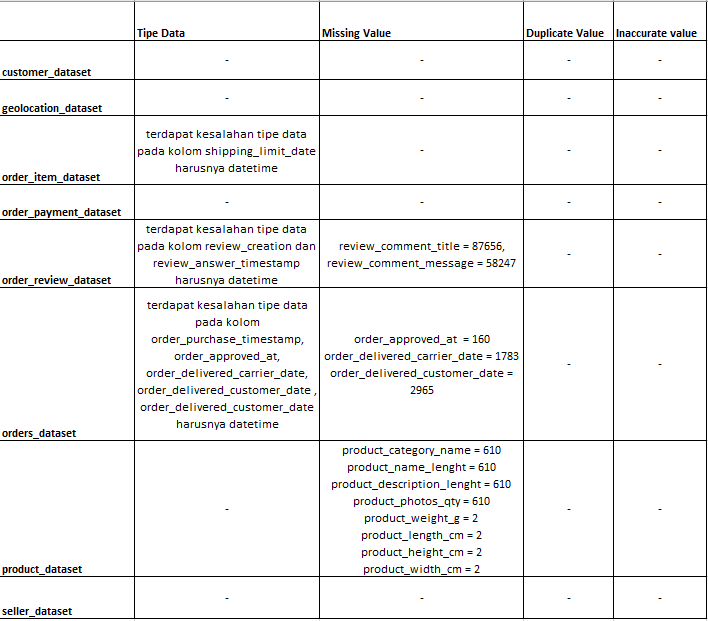




### Cleaning Data

#### cleaning data order_item_dataset

In [32]:
# merubah tipe data shipping_limit_date ke datetime
order_items_dataset['shipping_limit_date'] = pd.to_datetime(order_items_dataset['shipping_limit_date'])

In [33]:
# cek hasil transformasi tipe data
order_items_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


#### cleaning order_payments_dataset

In [34]:
order_payments_dataset.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [35]:
order_payments_dataset.payment_type.value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

In [36]:
# mengganti payment_type _ menjadi (" ")
order_payments_dataset['payment_type'] = order_payments_dataset['payment_type'].str.replace('_', ' ')
order_payments_dataset.payment_type.value_counts()

credit card    76795
boleto         19784
voucher         5775
debit card      1529
not defined        3
Name: payment_type, dtype: int64

#### cleaning order_review_dataset

In [37]:
# merubah tipe data review_creation dan review_answer_timestamp ke datetime
order_reviews_dataset['review_creation_date'] = pd.to_datetime(order_reviews_dataset['review_creation_date'])
order_reviews_dataset['review_answer_timestamp'] = pd.to_datetime(order_reviews_dataset['review_answer_timestamp'])

In [38]:
# cek hasil transformasi tipe data
order_reviews_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


In [39]:
# handling missing value kolom review_comment_title
order_reviews_dataset[order_reviews_dataset.review_comment_title.isna()]

# mengganti review_comment_title (NaN) dengan kosong (-)
order_reviews_dataset['review_comment_title'].fillna('-', inplace=True)

In [40]:
# handling missing value kolom review_comment_message
order_reviews_dataset[order_reviews_dataset.review_comment_message.isna()]

# mengganti review_comment_message (NaN) dengan kosong (-)
order_reviews_dataset['review_comment_message'].fillna('-', inplace=True)

In [41]:
order_reviews_dataset.isnull().sum()

review_id                  0
order_id                   0
review_score               0
review_comment_title       0
review_comment_message     0
review_creation_date       0
review_answer_timestamp    0
dtype: int64

#### cleaning orders_dataset

In [42]:
# merubah tipe data order_purchase_timestamp ke datetime
orders_dataset['order_purchase_timestamp'] = pd.to_datetime(orders_dataset['order_purchase_timestamp'])

# merubah tipe data order_approved_at ke datetime
orders_dataset['order_approved_at'] = pd.to_datetime(orders_dataset['order_approved_at'])

# merubah tipe data order_delivered_carrier_date ke datetime
orders_dataset['order_delivered_carrier_date'] = pd.to_datetime(orders_dataset['order_delivered_carrier_date'])

# merubah tipe data order_delivered_customer_date ke datetime
orders_dataset['order_delivered_customer_date'] = pd.to_datetime(orders_dataset['order_delivered_customer_date'])

# merubah tipe data order_estimated_delivery_date ke datetime
orders_dataset['order_estimated_delivery_date'] = pd.to_datetime(orders_dataset['order_estimated_delivery_date'])

In [43]:
# cek hasil transformasi tipe data
orders_dataset.info()
print("-" * 50)
orders_dataset.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
--------------------------------------------------


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [44]:
# menampilkan missing value dari order_approved_at
orders_dataset[orders_dataset.order_approved_at.isna()]

# menghapus missing value dari order_approved_at
orders_dataset.dropna(subset=['order_approved_at'], inplace=True)

In [45]:
# menampilkan missing value dari order_delivered_carrier_date
orders_dataset[orders_dataset.order_delivered_carrier_date.isna()].sample(20)

# menghapus missing value dari order_delivered_carrier_date
orders_dataset.dropna(subset=['order_delivered_carrier_date'], inplace=True)

In [46]:
# menampilkan missing value dari order_delivered_customer_date
orders_dataset[orders_dataset.order_delivered_customer_date.isna()].sample(20)

# menghapus missing value dari order_delivered_customer_date
orders_dataset.dropna(subset=['order_delivered_customer_date'], inplace=True)

In [47]:
# cek hasil handling missing value
orders_dataset.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

#### cleaning products_dataset

In [48]:
# melihat values_count dari product_category_name
print("Jumlah unique product_category_name : ",products_dataset['product_category_name'].value_counts().count())

# melihat product_category_name paling sering muncul
print("Product paling sering muncul/mode : ",products_dataset['product_category_name'].mode())

# mengisi missing value dengan product_category_name paling sering muncul
print("Mengisi missing value",products_dataset['product_category_name'].fillna(products_dataset['product_category_name'].mode()[0], inplace=True))

Jumlah unique product_category_name :  73
Product paling sering muncul/mode :  0    cama_mesa_banho
Name: product_category_name, dtype: object
Mengisi missing value None


In [49]:
# melihat data missing value
products_dataset[products_dataset.product_name_lenght.isna()].sample(20)
products_dataset[products_dataset.product_description_lenght.isna()].sample(20)
products_dataset[products_dataset.product_photos_qty.isna()].sample(20)


# mengisi missing value dengan mean dari product_name_length dengan mean dari product_name_length
products_dataset['product_name_lenght'].fillna(products_dataset['product_name_lenght'].mean(), inplace=True)

# mengisi missing value dengan mean dari product_description_length dengan mean dari product_description_length
products_dataset['product_description_lenght'].fillna(products_dataset['product_description_lenght'].mean(), inplace=True)

# mengisi missing value dengan mean dari product_photos_qty dengan mean dari product_photos_qty
products_dataset['product_photos_qty'].fillna(products_dataset['product_photos_qty'].mean(), inplace=True)


In [50]:
# hapus missing value
products_dataset.dropna(inplace=True)

In [51]:
# cek hasil handling missing value
products_dataset.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

In [52]:
products_dataset.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
70,d0389f20b3d11de54e1e4561df147683,casa_construcao,55.0,1441.0,1.0,10000.0,60.0,25.0,25.0
21375,25640ad1216178967884d69ebe5140cc,bebes,22.0,273.0,1.0,1600.0,60.0,35.0,35.0
7864,7be98a47ebb9ce48dfa91163428bb9d9,livros_tecnicos,41.0,744.0,1.0,2800.0,29.0,5.0,24.0
9372,3a92aca3f76960cbae25ef2496c03e09,beleza_saude,59.0,1066.0,3.0,150.0,20.0,10.0,20.0
32344,6c58b4fa44aeffc444c5f0f178029cc6,relogios_presentes,53.0,493.0,2.0,300.0,16.0,11.0,11.0


In [53]:
# mengahapus product_category_name yang ada _
products_dataset['product_category_name'] = products_dataset['product_category_name'].str.replace('_', ' ')
products_dataset.sample(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
12127,5fea1628f3d9680db59c20a4d80c221f,beleza saude,48.0,2718.0,1.0,400.0,19.0,11.0,12.0
30431,69ae578cb2e84390bb7c44216380ad5e,beleza saude,60.0,1895.0,1.0,4650.0,23.0,23.0,23.0
10801,6abb8f3aa658704b9845176c7ff453c8,cama mesa banho,35.0,218.0,1.0,1400.0,55.0,10.0,40.0
25033,c98f9b6939bc77914b077d6aa93cd97c,dvds blu ray,59.0,1085.0,1.0,200.0,20.0,2.0,14.0
20483,543cfc1fc80d636c64df24e8545818b9,dvds blu ray,48.0,751.0,1.0,200.0,20.0,2.0,14.0


## Exploratory Data Analysis (EDA)

##### Explore merged all *dataset*

In [54]:
all_data = pd.merge(customers_dataset, orders_dataset, on='customer_id', how='inner')
all_data = all_data.merge(order_reviews_dataset, on='order_id', how='inner')
all_data = all_data.merge(order_items_dataset, on='order_id', how='inner')
all_data = all_data.merge(products_dataset, on='product_id', how='inner')
all_data = all_data.merge(order_payments_dataset, on='order_id', how='inner')
all_data = all_data.merge(sellers_dataset, on='seller_id', how='inner')
all_data = all_data.merge(product_category_name_translation, on='product_category_name', how='inner')
all_data.shape

(28447, 40)

In [55]:
main_data = all_data.copy()

In [56]:
main_data.columns

Index(['customer_id', 'customer_unique_id', 'zip_code_prefix', 'customer_city',
       'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'review_id', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'order_item_id',
       'product_id', 'seller_id', 'shipping_limit_date', 'price',
       'freight_value', 'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'payment_sequential', 'payment_type', 'payment_installments',
       'payment_value', 'seller_zip_code_prefix', 'seller_city',
       'seller_state', 'product_category_name_english'],
      dtype='object')

In [57]:
main_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28447 entries, 0 to 28446
Data columns (total 40 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   customer_id                    28447 non-null  object        
 1   customer_unique_id             28447 non-null  object        
 2   zip_code_prefix                28447 non-null  int64         
 3   customer_city                  28447 non-null  object        
 4   customer_state                 28447 non-null  object        
 5   order_id                       28447 non-null  object        
 6   order_status                   28447 non-null  object        
 7   order_purchase_timestamp       28447 non-null  datetime64[ns]
 8   order_approved_at              28447 non-null  datetime64[ns]
 9   order_delivered_carrier_date   28447 non-null  datetime64[ns]
 10  order_delivered_customer_date  28447 non-null  datetime64[ns]
 11  order_estimated

In [58]:
main_data.isnull().sum()

customer_id                      0
customer_unique_id               0
zip_code_prefix                  0
customer_city                    0
customer_state                   0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_id                        0
review_score                     0
review_comment_title             0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [59]:
# menghapus kolom yang tidak diperlukan
# main_data.drop(columns=['order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date'], inplace=True)

##### mengelompokan product kategory

In [60]:
# mengelompokan category product
def classify_product(x):
  category = {
      'Furniture': ['office_furniture', 'furniture_decor', 'furniture_living_room', 'kitchen_dining_laundry_garden_furniture',
                     'bed_bath_table', 'home_comfort', 'home_comfort_2', 'home_construction', 'garden_tools', 'furniture_bedroom', 'furniture_mattress_and_upholstery'],
      'Electronics': ['auto', 'computers_accessories', 'musical_instruments', 'consoles_games', 'watches_gifts', 'air_conditioning', 'telephony', 'electronics',
                      'fixed_telephony', 'tablets_printing_image', 'computers', 'small_appliances_home_oven_and_coffee', 'small_appliances', 'audio', 'signaling_and_security', 'security_and_services'],
        'Fashion': ['fashio_female_clothing', 'fashion_male_clothing', 'fashion_bags_accessories', 'fashion_shoes', 'fashion_sport', 'fashion_underwear_beach', 'fashion_childrens_clothes', 'baby', 'cool_stuff'],
        'Home & Garden': ['housewares', 'home_confort', 'home_appliances', 'home_appliances_2', 'flowers', 'costruction_tools_garden', 'garden_tools', 'construction_tools_lights', 'costruction_tools_tools',
                          'luggage_accessories', 'la_cuisine', 'pet_shop', 'market_place'],
        'Entertainment': ['sports_leisure', 'toys', 'cds_dvds_musicals', 'music', 'dvds_blu_ray', 'cine_photo', 'party_supplies', 'christmas_supplies', 'arts_and_craftmanship', 'art'],
        'Beauty & Health': ['health_beauty', 'perfumery', 'diapers_and_hygiene'],
        'Food & Drinks': ['food_drink', 'drinks', 'food'],
        'Books & Stationery': ['books_general_interest', 'books_technical', 'books_imported', 'stationery'],
        'Industry & Construction': ['construction_tools_construction', 'construction_tools_safety', 'industry_commerce_and_business', 'agro_industry_and_commerce']
  }
  for cat, key in category.items():
    if x in key:
      return cat
  return 'others'

main_data['product_category'] = main_data['product_category_name_english'].apply(classify_product)

In [61]:
main_data['product_category'].value_counts()

Electronics           13181
Entertainment          4406
Beauty & Health        3497
Fashion                3095
Books & Stationery     2557
Food & Drinks           874
Home & Garden           837
Name: product_category, dtype: int64

##### membuat volume barang

In [62]:
# membuat volume kolom dari (product_length_cm * product_height_cm * product_width_cm)
main_data['volume'] = main_data['product_length_cm'] * main_data['product_height_cm'] * main_data['product_width_cm']

# mengapus kolom (product_length_cm, product_height_cm, product_width_cm)
main_data.drop(columns=['product_length_cm', 'product_height_cm', 'product_width_cm'], inplace=True)

##### Membuat estimasi pengiriman

In [63]:
# mencari estimasi pengiriman dari tanggal pembelian sampai perkiraan tanggal pengiriman (order_estimated_delivery_date - order_purchase_timestamp)
main_data['estimated_days'] = (main_data['order_estimated_delivery_date'] - main_data['order_purchase_timestamp']).dt.days

In [64]:
# mencari estimasi pengiriman dari tanggal pembelian sampai di kirim ke pelanggan (order_delivered_customer_date - order_purchase_timestamp)
main_data['arrival_days'] = (main_data['order_delivered_customer_date'] - main_data['order_purchase_timestamp']).dt.days

In [65]:
# mencari estimasi pengiriman dari pembelian tokosampai di kirim ke pelanggan (order_delivered_customer_date - order_delivered_carrier_date)
main_data['shipping_days'] = (main_data['order_delivered_customer_date'] - main_data['order_delivered_carrier_date']).dt.days

In [66]:
# cek tanggal yang tidak masuk akal di mana "order_delivered_carrier_date" lebih besar dari "order_delivered_customer_date"

print("jumlah data yang tidak masuk akal :", main_data[['order_delivered_carrier_date', 'order_delivered_customer_date']][main_data.shipping_days == 0].count())
print("-" * 50)
main_data[['order_delivered_carrier_date', 'order_delivered_customer_date']][main_data.shipping_days == 0].sample(5)

jumlah data yang tidak masuk akal : order_delivered_carrier_date     824
order_delivered_customer_date    824
dtype: int64
--------------------------------------------------


,order_delivered_carrier_date,order_delivered_customer_date
961,2018-02-14 16:38:36,2018-02-15 15:42:49
18830,2017-12-19 23:51:36,2017-12-20 13:56:52
21801,2018-01-31 04:36:29,2018-01-31 19:35:57
17796,2018-03-20 21:21:46,2018-03-21 13:54:27
4616,2017-12-27 09:31:46,2017-12-27 16:18:37


In [67]:
# menghapus data yang tidak masuk akal
main_data.drop((main_data[['order_delivered_carrier_date', 'order_delivered_customer_date']][main_data.shipping_days < 0]).index, inplace=True)

##### Membuat Status Pengiriman

In [68]:
main_data.sample(5)

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,volume,estimated_days,arrival_days,shipping_days
4199,5e06c29dcd3fc5e706c53ce0b6be1941,03c4286232d282681d979387068e1d34,65470,sao mateus do maranhao,MA,35b19a06842a6d82121828643e1bd16e,delivered,2018-07-11 20:01:00,2018-07-11 20:10:15,2018-07-12 13:48:00,2018-07-23 22:36:56,2018-08-02,822130516c8aabcf7ac1e31ac8a33d02,5,-,-,2018-07-24,2018-07-25 09:14:07,2,633610a66bd9c0ecd11d46bf42c4ea80,4e480be820e37de1444325ff358c9296,2018-07-17 20:10:15,215.15,71.72,automotivo,59.0,864.0,3.0,6500.0,1,credit card,10,573.74,37410,tres coracoes,MG,auto,Electronics,28880.0,21,12,11
26755,8ea0f24dde338f421c9526331050927e,0a3181fec8b18045f33c46ab39d32318,35540,oliveira,MG,510d5ab9d1299666e8dadb24d137209d,delivered,2017-12-03 22:58:28,2017-12-05 22:53:30,2017-12-07 16:21:36,2017-12-11 16:49:52,2017-12-27,c0768e26a52bd7869ab941e5bfef9a14,3,-,Foi uma compra que chegou antes da data marcad...,2017-12-12,2017-12-15 10:41:58,1,3d0552899dbe2f89cff6197aab33fe99,7299e27ed73d2ad986de7f7c77d919fa,2017-12-11 22:53:30,130.00,13.93,alimentos,34.0,826.0,1.0,1084.0,1,credit card,3,143.93,38440,araguari,MG,food,Food & Drinks,12636.0,23,7,4
25725,e4140a9ccef4da9c88295faffabaa7ee,1600e56406cd89032fefb96f79ffeef9,8675,suzano,SP,6d6552e71bec5188cfa548c7f7094dad,delivered,2018-05-04 19:02:15,2018-05-04 19:15:24,2018-05-08 12:57:00,2018-05-10 01:08:51,2018-05-18,1c50690e4e378ec2454009763537d434,5,-,-,2018-05-10,2018-05-12 19:54:30,1,8feb43a054893da80044ad0f693fd0ad,f3c38ab652836d21de61fb8314b69182,2018-05-10 19:15:24,49.00,7.39,eletronicos,37.0,368.0,2.0,150.0,1,credit card,1,56.39,1206,sao paulo,SP,electronics,Electronics,2992.0,13,5,1
20216,a972cb872aeefad4764efd7b891d212d,5528af7e794d044322ea7fc8cde9a086,9781,sao bernardo do campo,SP,aec9735c10ae64b07f60d33908e5b58a,delivered,2017-11-19 20:02:05,2017-11-19 20:10:35,2017-11-21 23:07:00,2017-11-24 22:16:51,2017-12-01,838e8b6a83214bde89a46a2726f7debb,5,-,"Parabéns ao stark, produto entregue bem antes ...",2017-11-25,2017-11-27 10:18:34,1,c44fd47f82e429f739693c82c73a43b4,7040e82f899a04d1b434b795a43b4617,2017-11-23 20:10:35,118.90,8.09,telefonia,41.0,749.0,3.0,401.0,1,credit card,1,126.99,1026,sao paulo,SP,telephony,Electronics,1683.0,11,5,2
15628,df55c14d1476a9a3467f131269c2477f,da122df9eeddfedc1dc1f5349a1a690c,28970,araruama,RJ,a96610ab360d42a2e5335a3998b4718a,delivered,2017-04-01 15:58:40,2017-04-03 13:25:18,2017-04-11 15:10:34,2017-04-17 11:04:45,2017-05-02,52632252782892317727260a87bc0663,5,-,-,2017-04-18,2017-04-21 15:17:33,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34,eletroportateis,41.0,1780.0,2.0,22600.0,1,credit card,10,4950.34,13480,limeira,SP,small_appliances,Electronics,88000.0,30,15,5


In [69]:
# mencari status pengiriman dari penjual ke ekspedisi/kurir (shipping_limit_date - order_delivered_carrier_date)
main_data['seller_to_kurir'] = np.where((main_data['shipping_limit_date'] - main_data['order_delivered_carrier_date']).dt.days >= 0, 'On time', 'Late')

In [70]:
# mencari status pengiriman dari kurir ke pelanggan (order_estimated_delivery_date - order_delivered_customer_date)
main_data['kurir_to_customer'] = np.where((main_data['order_estimated_delivery_date'] - main_data['order_delivered_customer_date']).dt.days >= 0, 'On time', 'Late')

In [71]:
# membuat function rates untuk menghitung rate dari status pengiriman
def rates(x):
  if x < 6:
    return 'Very Fast'
  elif x < 12:
    return 'Fast'
  elif x < 24:
    return 'Normal'
  elif x < 48:
    return 'Slow'
  else:
    return 'Very Slow'

main_data['shipping_deliveryrate'] = main_data['shipping_days'].apply(rates)

In [72]:
main_data.sample(5)

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,volume,estimated_days,arrival_days,shipping_days,seller_to_kurir,kurir_to_customer,shipping_deliveryrate
22063,6108edce175bb2a5d603884594fae1d5,b8013f255b89f49e84da9464917defbf,30240,belo horizonte,MG,9e782eef55c0f6f0a4de48f967232e91,delivered,2017-10-07 22:42:26,2017-10-07 22:56:12,2017-10-09 22:00:08,2017-10-13 18:58:36,2017-11-01,a92c91484665dda9efe7167bca7a27ef,5,-,Comprei dois Moto G5 S plus com duas capas e d...,2017-10-14,2017-10-15 01:02:06,2,2756f88aa420dd0c5aa25b2db78d4664,ef506c96320abeedfb894c34db06f478,2017-10-12 22:56:12,22.99,14.10,telefonia,58.0,381.0,3.0,200.0,1,credit card,1,74.18,3569,sao paulo,SP,telephony,Electronics,836.0,24,5,3,On time,On time,Very Fast
11802,a51b9cba9204400d980afd668d27d3c9,3e5306add1209e5ba184092dd1587282,71925,brasilia,DF,caada4ca97e8e01c14535a79224324d9,delivered,2018-01-11 15:11:40,2018-01-11 15:27:44,2018-01-15 15:09:05,2018-01-17 20:56:53,2018-02-06,5b4d01b5cba75625d08cf260bc1f29de,5,-,-,2018-01-18,2018-01-18 23:34:56,1,617186c3d97ea56c9c683a8a3974e8c1,cc419e0650a3c5ba77189a1882b7556a,2018-01-19 15:28:14,84.99,15.35,perfumaria,59.0,1071.0,1.0,550.0,1,credit card,10,100.34,9015,santo andre,SP,perfumery,Beauty & Health,5040.0,25,6,2,On time,On time,Very Fast
11523,cd7cd63216b250f2ad1f56ddbf0ad588,3b0671e86baa6a24c10be6cb33e65a69,2535,sao paulo,SP,f8cb4efdea8763488b96468162ab5e93,delivered,2018-05-08 12:26:55,2018-05-08 12:56:48,2018-05-08 15:19:00,2018-05-14 23:56:58,2018-05-22,fe0b776d6f4a464054195d51f2a7425f,5,-,-,2018-05-15,2018-05-16 03:16:27,1,a30ea5a9dbd95db5a674c4beadb4fb0d,95e03ca3d4146e4011985981aeb959b9,2018-05-10 12:56:48,25.00,15.23,perfumaria,53.0,369.0,2.0,450.0,1,credit card,2,40.23,21210,rio de janeiro,RJ,perfumery,Beauty & Health,8505.0,13,6,6,On time,On time,Fast
27845,dbddac608b5206746031a5b32d8fb469,888be311c0d0d6bddf2075a680df2c39,40375,salvador,BA,508febacffe1f7bfaf96a76a59677e6d,delivered,2017-05-08 12:06:44,2017-05-09 13:10:43,2017-05-09 13:36:01,2017-05-30 09:43:51,2017-06-08,a093ab05b6d943cf1415f31a994e99d3,5,-,-,2017-05-31,2017-06-01 13:36:37,1,1713e5b60dfb5b779fd077af351624c0,d91fb3b7d041e83b64a00a3edfb37e4f,2017-05-15 13:10:43,100.00,17.14,eletrodomesticos,52.0,235.0,3.0,450.0,1,credit card,2,117.14,11704,praia grande,SP,home_appliances,Home & Garden,12250.0,30,21,20,On time,On time,Normal
1095,f9221637539179d48001ecf3e5311cc9,46417d48bc2287961151018320f0addb,94080,gravatai,RS,f9ec88f49637ef75f91d3b52f89b2809,delivered,2018-04-12 16:54:10,2018-04-13 02:32:07,2018-04-13 17:32:29,2018-04-30 19:06:47,2018-05-14,6ca47645b37a83e0191c07cd1a7ce4d6,5,-,-,2018-05-01,2018-05-02 17:29:25,1,629e019a6f298a83aeecc7877964f935,c003204e1ab016dfa150abc119207b24,2018-04-19 02:31:42,109.90,23.31,automotivo,57.0,1166.0,5.0,1750.0,1,boleto,1,133.21,7790,cajamar,SP,auto,Electronics,27000.0,31,18,17,On time,On time,Normal


##### Membuat kolom baru Tahun, Bulan, Hari

In [73]:
all_data = main_data.copy()

In [74]:
# mencari tahun, bulan dan hari dari order_purchase_timestamp
all_data['year'] = all_data['order_purchase_timestamp'].dt.year
all_data['month'] = all_data['order_purchase_timestamp'].dt.month
all_data['day'] = all_data['order_purchase_timestamp'].dt.day

## Visualization & Explanatory Analysis

- Berapa total pendapatan penjualan selama periode dataset ini (2016-2018) ?
- Kota mana yang paling banyak Customer bertransaksi?
- Dapatkah kita mengidentifikasi penjual atau toko mana yang paling banyak menerima pesanan?
- Bagaimana perkembangan jumlah pesanan selama setiap bulan dalam dataset ini ?
- Bagaimana korelasi antara waktu pengiriman perkiraan dengan tingkat kepuasan pelanggan ?
- Dapatkah kita mengidentifikasi produk teratas yang paling sering dibeli oleh pelanggan?
- Berapa persentase customer dalam melakukan metode pembayaran ?
-  top 10 kota paling tinggi revenue ?
- Rata - Rata review score atau ulasan pada product dan kategori product ?
- RFM Analysis ?


### Pertanyaan 1: Berapa total pendapatan penjualan selama periode dataset ini (2016-2018) ?

In [110]:
# mencari total revenue setiap tahun
revenue_year = all_data.groupby('year')['payment_value'].sum()
revenue_year

year
2016      18767.73
2017    1971492.60
2018    2300648.55
Name: payment_value, dtype: float64

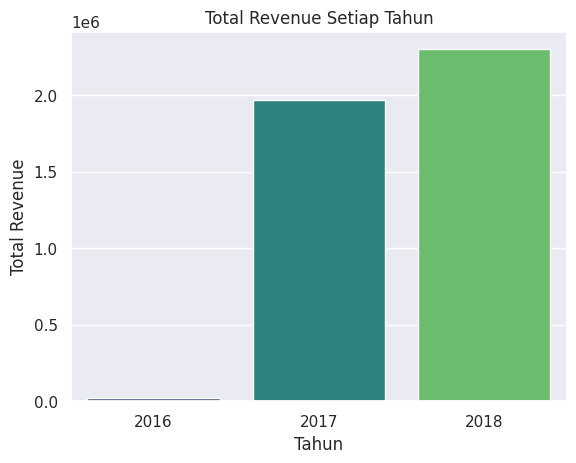

In [76]:
# visualisasi total revenue setiap tahun
sns.barplot(x=revenue_year.index, y=revenue_year.values, palette='viridis')
plt.title('Total Revenue Setiap Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Revenue')
plt.show()


In [77]:
# visualisasi rata-rata revenue setiap bulan
revenue_month = all_data.groupby('month')['payment_value'].mean()
revenue_month

month
1     130.241578
2     126.388873
3     139.353964
4     178.158231
5     148.346408
6     169.070839
7     133.654303
8     165.029589
9     189.891315
10    167.883206
11    141.078841
12    142.909597
Name: payment_value, dtype: float64

<ipython-input-78-cf2a0139ff7f>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=revenue_month.index, y=revenue_month.values,palette='viridis')


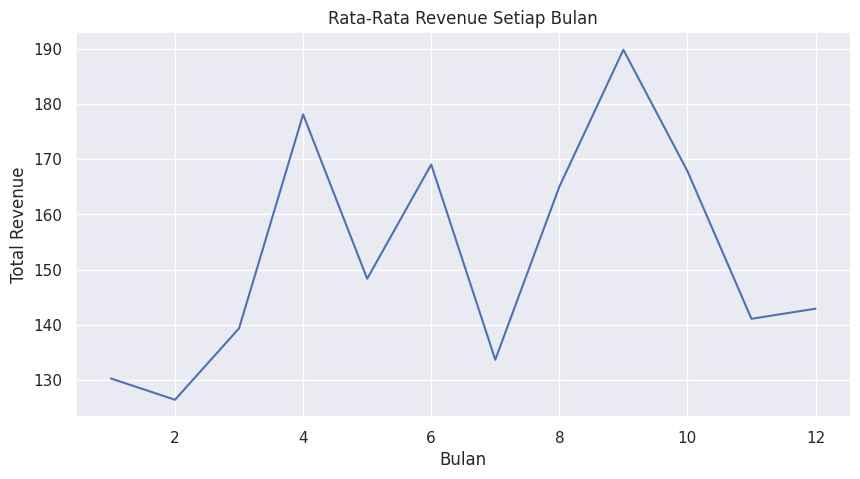

In [78]:
# visualisasi total revenue setiap bulan
plt.figure(figsize=(10, 5))
sns.lineplot(x=revenue_month.index, y=revenue_month.values,palette='viridis')
plt.title('Rata-Rata Revenue Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Revenue')
plt.show()

dari linechart tersebut, dapat kita lihat bahwa rata-rata revenue naik turun akan tetapi trennya cenderung positif. bisa kita lihat juga tren pada bulan maret(3) ,april(4), agustus(8) dan sepetember(9) mengalami kenaikan revenue yang signifikan. ini bisa karena faktor promo, event, dan lain-lain.

In [79]:
# visualisasi total revenue setiap hari
revenue_day = all_data.groupby('day')['payment_value'].mean()
revenue_day

day
1     169.389188
2     159.775005
3     139.562138
4     149.915808
5     164.338069
6     155.028665
7     157.066104
8     134.314548
9     165.701342
10    150.701873
11    158.990176
12    146.565311
13    146.086705
14    141.224784
15    145.846505
16    145.347847
17    153.505933
18    173.711961
19    179.619689
20    140.261159
21    145.234357
22    127.123326
23    128.980425
24    134.580824
25    146.837133
26    141.273838
27    147.705788
28    165.345958
29    160.675722
30    146.735352
31    158.900208
Name: payment_value, dtype: float64

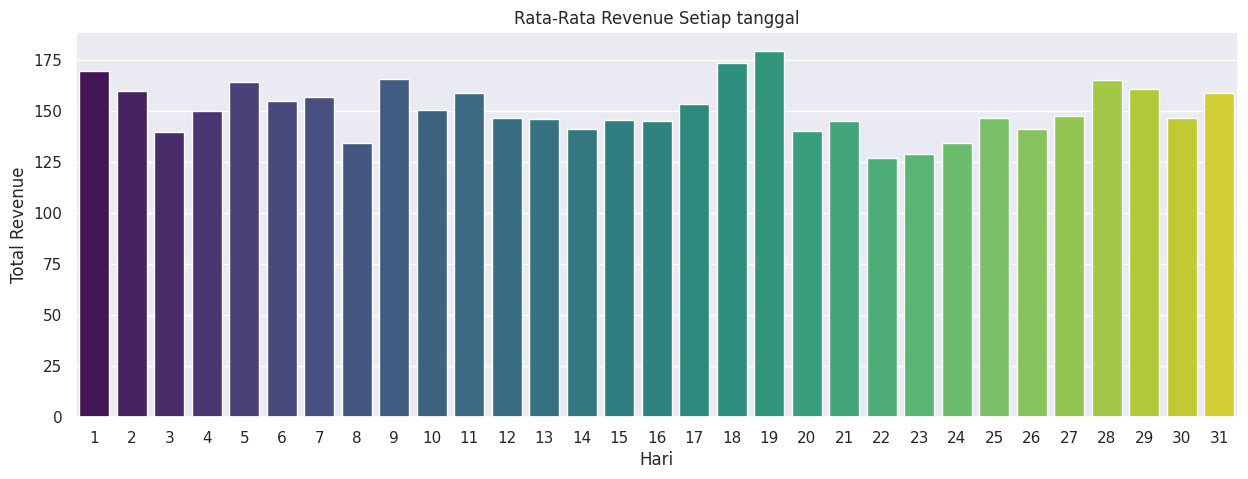

In [80]:
# visualisasi total revenue setiap hari
plt.figure(figsize=(15, 5))
sns.barplot(x=revenue_day.index, y=revenue_day.values, palette='viridis')
plt.title('Rata-Rata Revenue Setiap tanggal')
plt.xlabel('Hari')
plt.ylabel('Total Revenue')
plt.show()

### Pertanyaan 2: Kota mana yang paling banyak Customer bertransaksi?

In [81]:
# kota yang paling banyak customer berdasarkan jumlah order
city =all_data.groupby('customer_city')['order_id'].nunique().sort_values(ascending=False)
print(city.head(10))
print(city.tail(10))

customer_city
sao paulo                3757
rio de janeiro           1651
belo horizonte            680
brasilia                  584
curitiba                  380
campinas                  365
porto alegre              327
salvador                  320
guarulhos                 284
sao bernardo do campo     247
Name: order_id, dtype: int64
customer_city
joaquim pires    1
joao ramalho     1
joao alfredo     1
joanopolis       1
jesuitas         1
jerico           1
jeremoabo        1
jaua             1
jatauba          1
ze doca          1
Name: order_id, dtype: int64


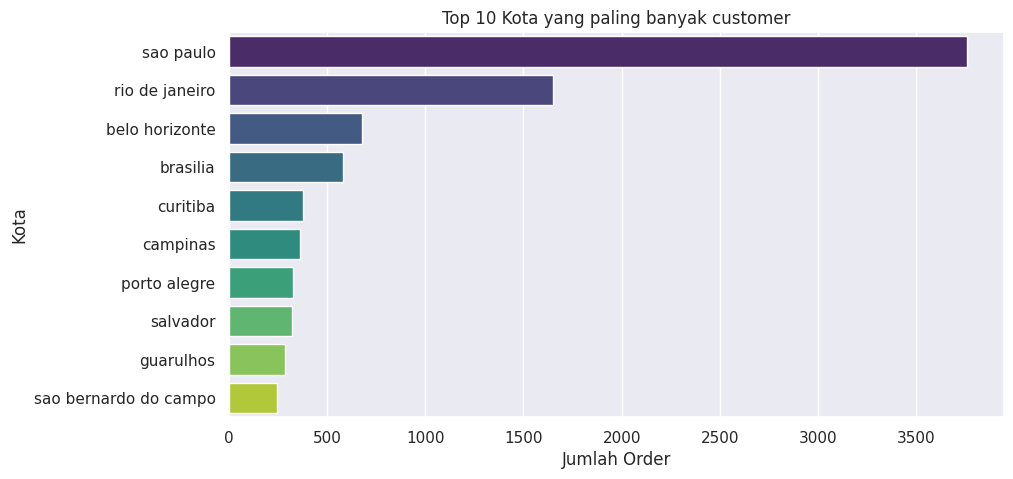

In [82]:
# visualisasi kota yang paling banyak customerberdasarkan jumlah order
plt.figure(figsize=(10, 5))
sns.barplot(y=city.head(10).index, x=city.head(10).values, palette='viridis')
plt.title('Top 10 Kota yang paling banyak customer')
plt.xlabel('Jumlah Order')
plt.ylabel('Kota')
plt.show()

1. Sao Paulo memiliki jumlah customer yang jauh lebih banyak daripada kota-kota lainnya, dengan total  3757 customer yang bertansaksi. Hal ini mungkin dikarenakan Sao Paulo adalah kota terbesar dan pusat ekonomi di Brasil, sehingga memiliki populasi dan aktivitas bisnis yang tinggi.

2. Rio de Janeiro juga memiliki jumlah customer yang signifikan, meskipun lebih rendah daripada Sao Paulo. Hal ini bisa disebabkan oleh status Rio de Janeiro sebagai salah satu kota terbesar dan tujuan wisata utama di Brasil.

3. Belo Horizonte, Brasilia, Curitiba, dan Campinas memiliki jumlah customer yang cukup tinggi, tetapi masih lebih rendah daripada Sao Paulo dan Rio de Janeiro.

Dari informasi ini, kita dapat menyimpulkan bahwa ada perbedaan signifikan dalam distribusi customer di berbagai kota, dengan Sao Paulo dan Rio de Janeiro menjadi kota dengan jumlah customer terbanyak. Analisis ini dapat membantu dalam pengambilan keputusan terkait strategi pemasaran, manajemen rantai pasokan, atau ekspansi bisnis di wilayah tertentu

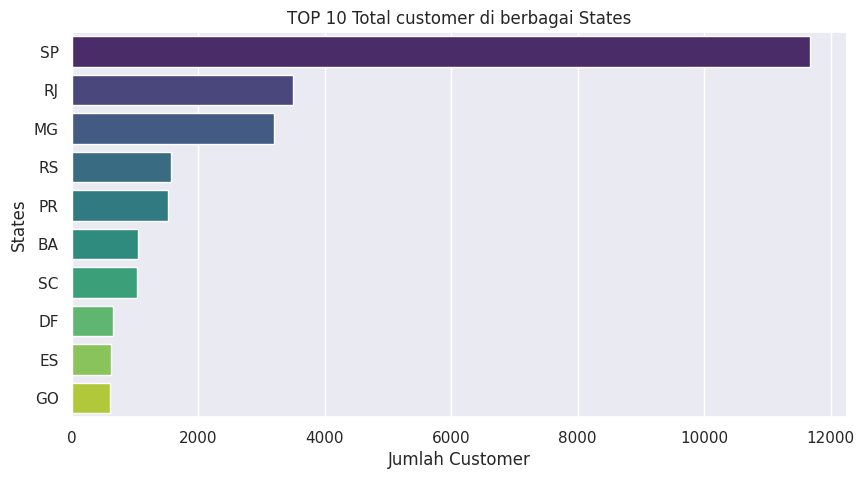

In [83]:
# total jumlah customer di berbagai kota
plt.figure(figsize=(10, 5))
sns.barplot(x=all_data['customer_state'].value_counts().values[0:10], y=all_data['customer_state'].value_counts().index[0:10], palette='viridis')
plt.title('TOP 10 Total customer di berbagai States')
plt.xlabel('Jumlah Customer')
plt.ylabel('States')
plt.show()

In [84]:
# order status
all_data['order_status'].value_counts(normalize=True)

delivered    0.999895
canceled     0.000105
Name: order_status, dtype: float64

bisa dilihat 99% semua pesanan diterima dan hanya 3 pesanan yang cancelled.

### Pertanyaan 3 : Dapatkah kita mengidentifikasi penjual atau toko mana yang paling banyak menerima pesanan?

In [85]:
# seller yang paling banyak mendapatkan order
seller = all_data.groupby('seller_id')['order_id'].count().sort_values(ascending=False)
seller.head(10)

seller_id
ea8482cd71df3c1969d7b9473ff13abc    1217
3d871de0142ce09b7081e2b9d1733cb1    1108
8b321bb669392f5163d04c59e235e066     947
cc419e0650a3c5ba77189a1882b7556a     730
128639473a139ac0f3e5f5ade55873a5     550
d91fb3b7d041e83b64a00a3edfb37e4f     536
8581055ce74af1daba164fdbd55a40de     446
53243585a1d6dc2643021fd1853d8905     425
46dc3b2cc0980fb8ec44634e21d2718e     410
620c87c171fb2a6dd6e8bb4dec959fc6     389
Name: order_id, dtype: int64

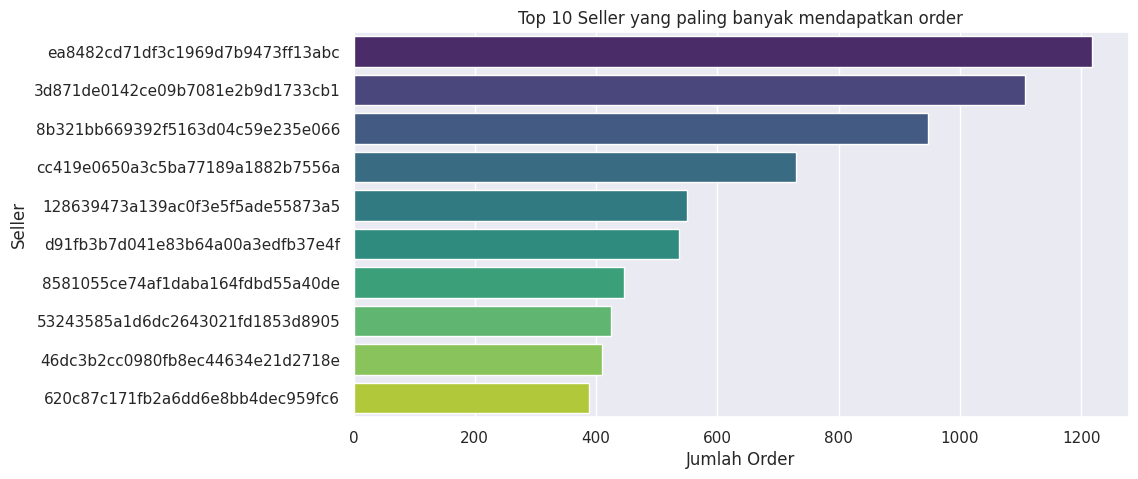

In [86]:
# visualisasi seller yang paling banyak mendapatkan order
plt.figure(figsize=(10, 5))
sns.barplot(y=seller.head(10).index, x=seller.head(10).values, palette='viridis')
plt.title('Top 10 Seller yang paling banyak mendapatkan order')
plt.xlabel('Jumlah Order')
plt.ylabel('Seller')
plt.show()

In [87]:
# kota yang paling banyak seller berdasarkan jumlah order
city_seller = all_data.groupby('seller_city')['order_id'].nunique().sort_values(ascending=False)
print(city_seller.head(10))
print(city_seller.tail(10))

seller_city
sao paulo               7845
campo limpo paulista    1042
santo andre              879
praia grande             703
rio de janeiro           673
campinas                 616
guarulhos                570
maringa                  552
atibaia                  503
belo horizonte           477
Name: order_id, dtype: int64
seller_city
irati                    1
indaial                  1
serrana                  1
hortolandia              1
guanhaes                 1
guaira                   1
santa rosa de viterbo    1
formosa                  1
extrema                  1
xaxim                    1
Name: order_id, dtype: int64


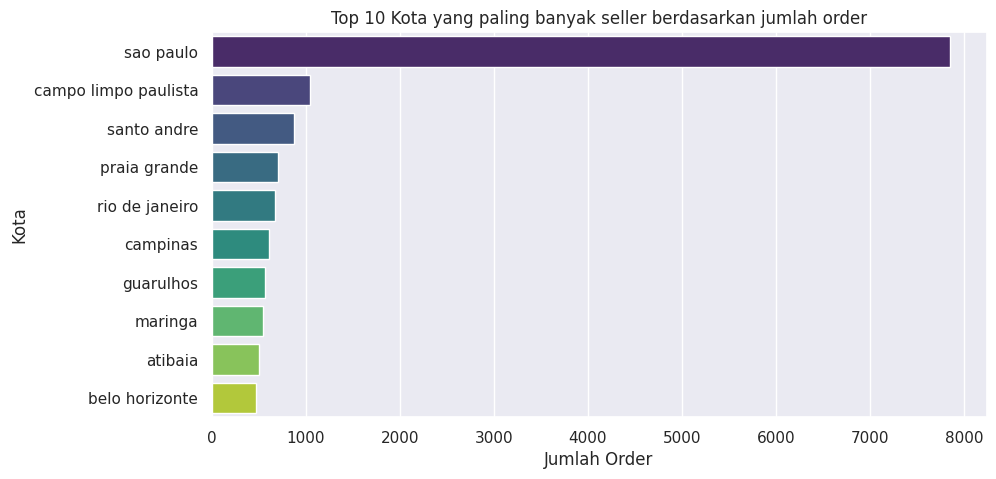

In [88]:
# visualisasi kota yang paling banyak seller berdasarkan jumlah order
plt.figure(figsize=(10, 5))
sns.barplot(y=city_seller.head(10).index, x=city_seller.head(10).values, palette='viridis')
plt.title('Top 10 Kota yang paling banyak seller berdasarkan jumlah order')
plt.xlabel('Jumlah Order')
plt.ylabel('Kota')
plt.show()

1. Sao Paulo memiliki jumlah order yang paling tinggi di antara semua kota seller. Ini menunjukkan bahwa Sao Paulo adalah pusat aktivitas penjualan online yang signifikan di Brasil, dengan jumlah penjual dan transaksi yang tinggi.

2. Campo Limpo Paulista memiliki jumlah order yang cukup tinggi, meskipun jauh lebih rendah daripada Sao Paulo. Hal ini mungkin menunjukkan bahwa ada komunitas penjual yang aktif di kota tersebut atau adanya bisnis online yang signifikan di wilayah tersebut.

Dari informasi ini, kita dapat menyimpulkan bahwa penjualan online di Brasil memiliki variasi yang signifikan berdasarkan kota penjualnya. Sao Paulo merupakan pusat utama dari aktivitas penjualan online, sementara kota-kota lain memiliki kontribusi yang bervariasi dalam ekosistem perdagangan online. Analisis ini dapat membantu dalam pemahaman pola bisnis, manajemen logistik, dan pengembangan strategi pemasaran di berbagai kota.

### Pertanyaan 4 :Bagaimana perkembangan jumlah pesanan selama setiap bulan dalam dataset ini ?

In [89]:
# mencari total order setiap bulan
order_month = all_data.groupby('month')['order_id'].nunique()
order_month

month
1     2218
2     2102
3     2479
4     2381
5     2627
6     2334
7     2510
8     2600
9     1055
10    1273
11    1936
12    1774
Name: order_id, dtype: int64

<ipython-input-90-7c819b4a4f13>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=order_month.index, y=order_month.values, palette='viridis')


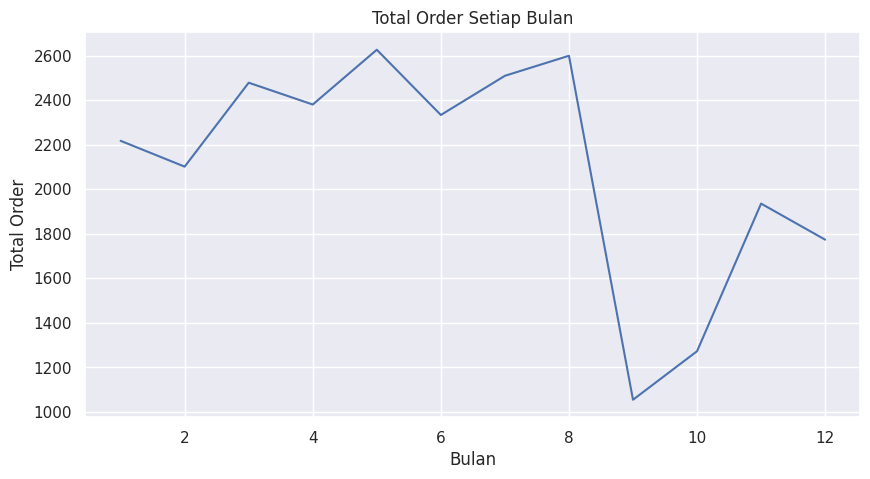

In [90]:
# visualisasi total order setiap bulan
plt.figure(figsize=(10, 5))
sns.lineplot(x=order_month.index, y=order_month.values, palette='viridis')
plt.title('Total Order Setiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Total Order')
plt.show()

dari linechart tersebut grafik menunjukan fluktuatif setiap bulan, seperti pada bulan 5 dan 8 order sangat banyak, akan tetapi pada bulan 9 sangat anjlok. perlu dilakukan analisis lebih lanjut terkait untuk mengetahui penyebab fluktuasinya. (event, promo, kompetitor dan lainnya)

### Pertanyaan 5 : Bagaimana korelasi antara waktu pengiriman perkiraan dengan tingkat kepuasan pelanggan ?

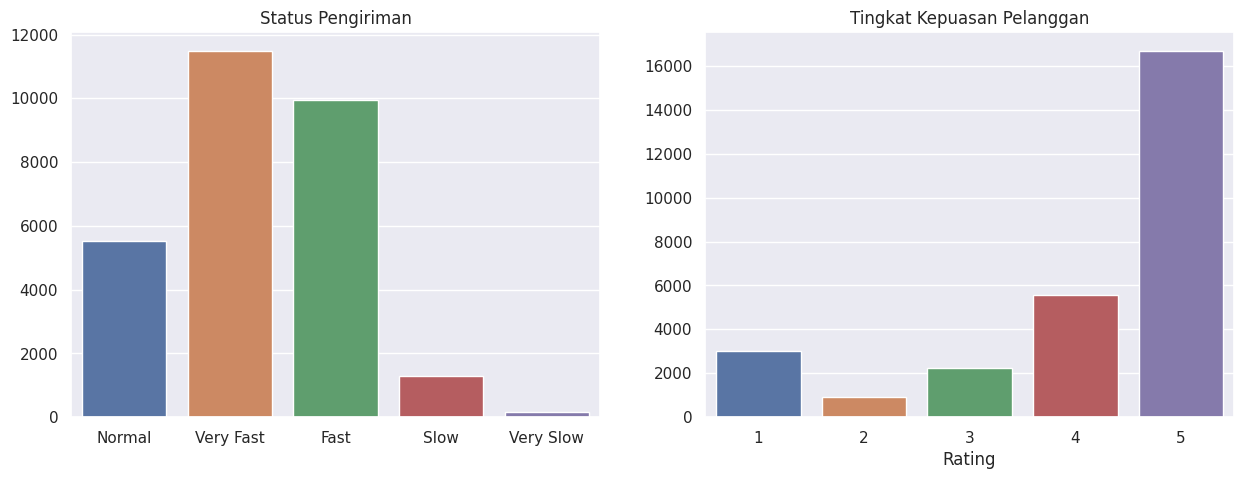

In [91]:
# korelasi antara pengiriman dan tingkat kepuasan pelanggan

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.countplot(x='shipping_deliveryrate', data=all_data, ax=ax[0])
ax[0].set_title('Status Pengiriman')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)


sns.countplot(x='review_score', data=all_data, ax=ax[1])
ax[1].set_title('Tingkat Kepuasan Pelanggan')
ax[1].set_xlabel('Rating')
ax[1].set_ylabel(None)

plt.show()

Dari chart tersebut, kesimpulan yang bisa didapat adalah sebagai berikut:

- Sebagian besar pengiriman adalah Very Fast, Fast dan normal.
- Ada jumlah dari pengiriman lambat dan sangat lambat akan tetapi sedikit.
- Rating kepuasan pelanggan sebagian besar adalah 5 dan 4. akan tetapi ada juga rating 1 lebih dari 2000 rating.

Berdasarkan hal ini, rekomendasi yang bisa dibuat adalah sebagai berikut:

- Perusahaan harus meningkatkan proses pengiriman mereka untuk mengurangi jumlah pengiriman lambat dan sangat lambat.
- Perusahaan juga harus bekerja untuk meningkatkan kepuasan pelanggan, terutama untuk rating 1 dan 2.

### Pertanyaan 6 : Dapatkah kita mengidentifikasi produk teratas yang paling sering dibeli oleh pelanggan?

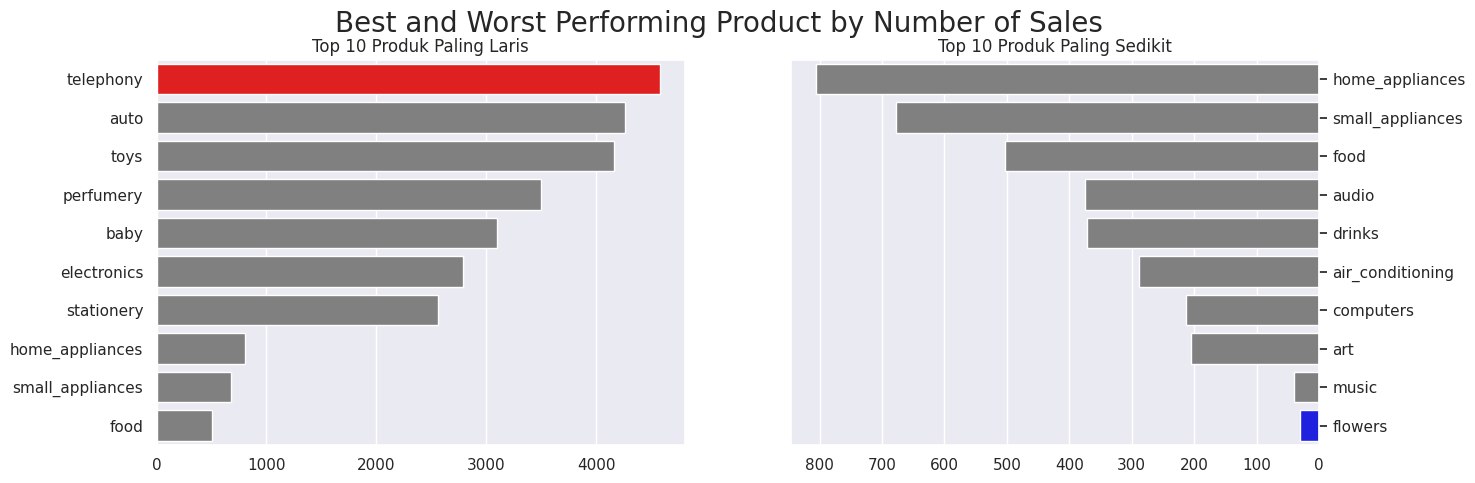

In [92]:
# menampilan produk paling laris dan terendah
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# membuat daftar warna khusus untuk produk paling laris
top_colors = ['red' if x == max(all_data['product_category_name_english'].value_counts().head(10).values) else 'grey' for x in all_data['product_category_name_english'].value_counts().head(10).values]

# membuat barplot dengan warna khusus
sns.barplot(x=all_data['product_category_name_english'].value_counts().head(10).values, y=all_data['product_category_name_english'].value_counts().head(10).index, palette=top_colors, ax=ax[0])
ax[0].set_title('Top 10 Produk Paling Laris')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)

# membuat daftar warna khusus untuk produk paling rendah
bottom_colors = ['blue' if x == min(all_data['product_category_name_english'].value_counts().tail(10).values) else 'grey' for x in all_data['product_category_name_english'].value_counts().tail(10).values]

# membuat barplot dengan warna khusus
sns.barplot(x=all_data['product_category_name_english'].value_counts().tail(10).values, y=all_data['product_category_name_english'].value_counts().tail(10).index, palette=bottom_colors, ax=ax[1])
ax[1].set_title('Top 10 Produk Paling Sedikit')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("Best and Worst Performing Product by Number of Sales", fontsize=20)
plt.show()


Terlihat bahwa product paling laris adalah telephony dengan total order lebih dari 4000 order. sedahkan product paling sedikit adalah Flowers dengan total order kurang dari 100 order.

In [93]:
all_data.sample(5)

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,volume,estimated_days,arrival_days,shipping_days,seller_to_kurir,kurir_to_customer,shipping_deliveryrate,year,month,day
27838,9eb585e566edc8b94a17ac5d6076d136,0e850ed5adc4abe0346435eda5b1a626,24220,niteroi,RJ,0544030711e50ec2cb6c15764d22891a,delivered,2018-04-12 17:36:07,2018-04-14 02:30:43,2018-04-17 00:16:46,2018-04-30 21:42:45,2018-05-02,72906dc18cd7aaed26be40c859613c65,1,É muito confusa.,Comprei duas válvulas solenóides iguais. Pague...,2018-05-01,2018-05-04 17:54:45,1,8d12ee985749e3ea570ed7f5c875479a,d91fb3b7d041e83b64a00a3edfb37e4f,2018-04-19 02:30:43,14.30,18.23,eletrodomesticos,50.0,872.0,2.0,150.0,1,boleto,1,32.53,11704,praia grande,SP,home_appliances,Home & Garden,3120.0,19,18,13,On time,On time,Normal,2018,4,12
18733,a05daaa7b79d7053da895ee3b342cf2d,d09bda44c78bc7eee6ab6a5814d73461,13480,limeira,SP,dd11631d8b02780b78bd97ec44a1ca8c,delivered,2016-10-04 23:08:08,2016-10-06 15:50:14,2016-10-31 14:38:06,2016-11-04 12:45:51,2016-11-28,843acce35ffed0c646c20d64550db7ab,5,-,Super recomendo; entregraram no tempo certo !,2016-11-05,2016-11-07 11:32:49,2,27051f70cfcbd63fec388f34e1f0d2a2,ed859002ad59dbf8cf3602696a6c3000,2016-10-10 15:50:15,149.90,19.33,climatizacao,46.0,293.0,1.0,5524.0,1,credit card,10,338.46,86035,londrina,PR,air_conditioning,Electronics,43512.0,54,30,3,Late,On time,Very Fast,2016,10,4
7590,7e665bf60370543be4e0c8065f1f014b,9017b04417699caea03574bfb3f968a9,94950,cachoeirinha,RS,b2190e086b2cf877f42a661db8eaeb8d,delivered,2018-03-25 22:21:25,2018-03-27 03:55:59,2018-03-28 22:04:20,2018-04-05 18:26:48,2018-04-19,02512e35ba2a78721ce72139221c52b7,5,-,-,2018-04-06,2018-04-06 22:14:10,1,880be32f4db1d9f6e2bec38fb6ac23ab,fa40cc5b934574b62717c68f3d678b6d,2018-04-02 03:55:59,44.90,14.16,brinquedos,45.0,589.0,4.0,200.0,1,boleto,1,59.06,2310,sao paulo,SP,toys,Entertainment,1232.0,24,10,7,On time,On time,Fast,2018,3,25
27295,39ca60b69b27e7490c2b5ca631644269,6b2d847a2beb67979c9dc075351c328e,18550,boituva,SP,898a1fd98d5540ee9b96e742c76877df,delivered,2017-12-25 19:52:56,2017-12-25 20:08:56,2017-12-26 19:16:01,2018-01-03 22:36:30,2018-01-23,f58d80c36f3130c0f225de98e0bafccc,5,-,-,2018-01-04,2018-01-08 23:43:50,1,401b5632c06c51319df083f1245a96ca,5656537e588803a555b8eb41f07a944b,2017-12-29 20:08:56,76.89,16.98,audio,51.0,207.0,1.0,300.0,1,credit card,2,93.87,72015,brasilia,DF,audio,Electronics,5120.0,28,9,8,On time,On time,Fast,2017,12,25
1610,bea786469988f01a94221fbda07470f4,7a197f277ebc82f12c9ff331f1862d1a,56903,serra talhada,PE,65b083a73802b06ce985dcc501f63181,delivered,2018-02-10 18:09:15,2018-02-10 18:25:42,2018-02-14 19:58:29,2018-02-21 13:37:42,2018-03-16,6d6107b823a3889a53248e128bc657c5,5,-,-,2018-02-22,2018-02-25 01:58:45,1,b00a5c58d3c4139cf67ccae61feb43f8,7142540dd4c91e2237acb7e911c4eba2,2018-02-15 18:25:42,429.90,31.41,automotivo,53.0,1145.0,6.0,3500.0,1,credit card,9,461.31,16301,penapolis,SP,auto,Electronics,25069.0,33,10,6,On time,On time,Fast,2018,2,10


In [94]:
# kategori produk paling laris
kategori_product = all_data.groupby('product_category')['order_id'].nunique().sort_values(ascending=False)
kategori_product

product_category
Electronics           11711
Entertainment          4003
Beauty & Health        3078
Fashion                2786
Books & Stationery     2251
Home & Garden           772
Food & Drinks           724
Name: order_id, dtype: int64

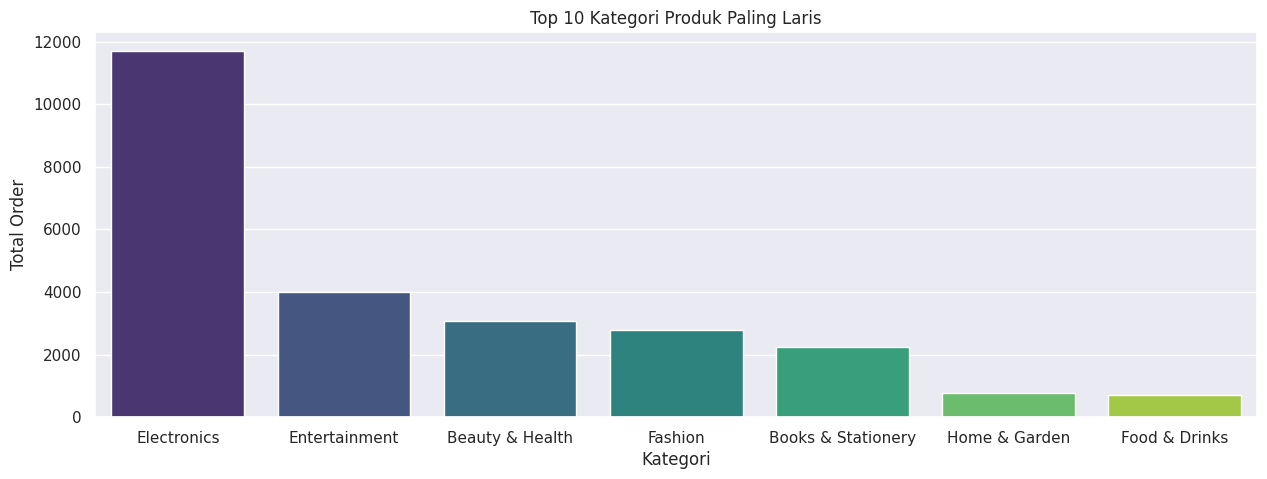

In [95]:
# visualisasi kategori produk paling laris
plt.figure(figsize=(15, 5))
sns.barplot(x=kategori_product.index, y=kategori_product.values, palette='viridis')
plt.title('Top 10 Kategori Produk Paling Laris')
plt.xlabel('Kategori')
plt.ylabel('Total Order')
plt.show()

### Pertanyaan 7 : Berapa persentase customer dalam melakukan metode pembayaran ?

In [96]:
# payment_method paling sering dilakukan oleh pelanggan
all_data['payment_type'].value_counts(normalize=True)

credit card    0.745992
boleto         0.190155
voucher        0.048031
debit card     0.015823
Name: payment_type, dtype: float64

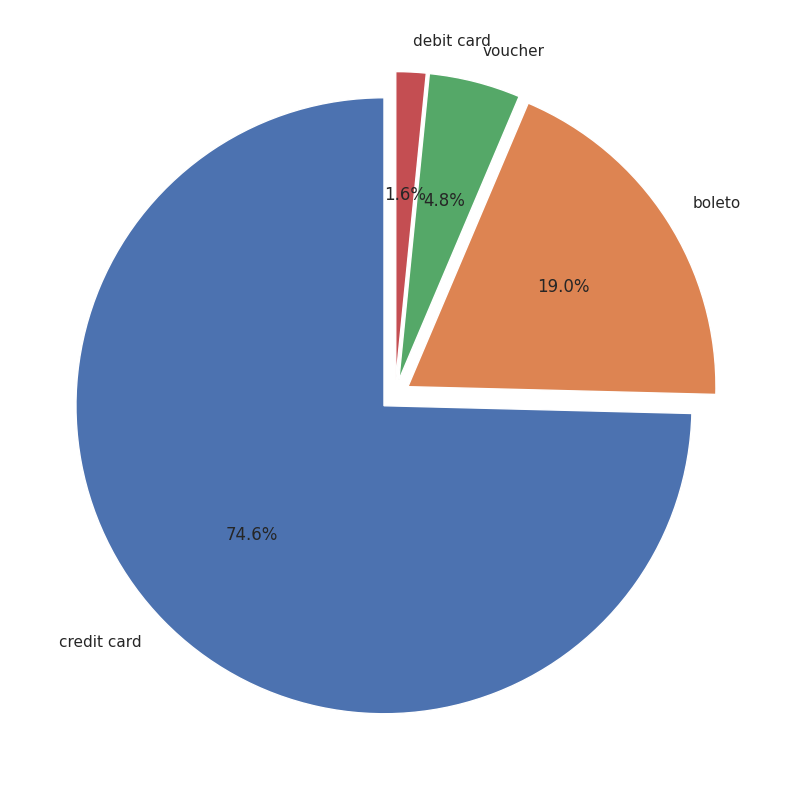

In [97]:
# visualisasi payment_method paling sering dilakukan oleh pelanggan
plt.figure(figsize=(10, 10))
plt.pie(all_data['payment_type'].value_counts(),
        labels=all_data['payment_type'].value_counts().index,
        autopct='%1.1f%%',
        explode=(0.05, 0.05, 0.05, 0.05),
        shadow=False,
        startangle=90);

bisa dilihat metode pembayaran paling sering dilakukan dengan cridit card sebesar 74.6% di ikuti oleh boleto 19%.

In [98]:
# total payment_type by rata-rata payment_value
total_payment_type = all_data.groupby('payment_type')[['payment_value']].sum().sort_values(by='payment_value', ascending=False).reset_index()
avg_payment_type = all_data.groupby('payment_type')[['payment_value']].mean().sort_values(by='payment_value', ascending=False).reset_index()
print(total_payment_type)
print(avg_payment_type)

  payment_type  payment_value
0  credit card     3391113.59
1       boleto      757643.44
2      voucher       85709.56
3   debit card       56442.29
  payment_type  payment_value
0  credit card     159.837556
1       boleto     140.096790
2   debit card     125.427311
3      voucher      62.744919


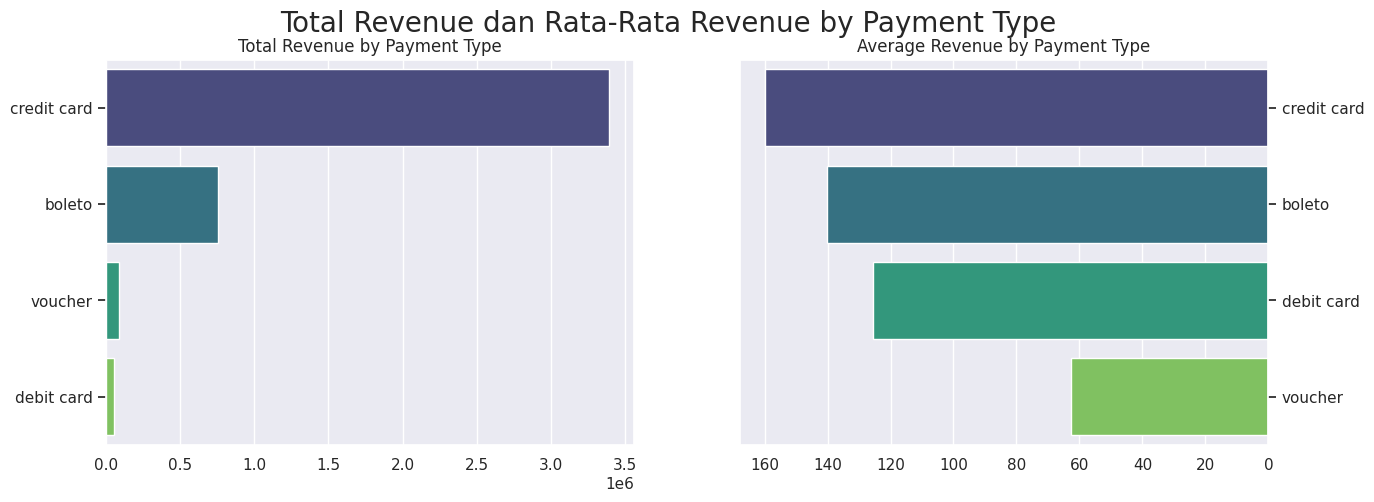

In [99]:
# visualisasi total payment_type by rata-rata payment_value
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
sns.barplot(y=total_payment_type['payment_type'], x=total_payment_type['payment_value'], palette='viridis', ax=ax[0])
ax[0].set_title('Total Revenue by Payment Type')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].yaxis.tick_left()

sns.barplot(y=avg_payment_type['payment_type'], x=avg_payment_type['payment_value'], palette='viridis', ax=ax[1])
ax[1].set_title('Average Revenue by Payment Type')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("Total Revenue dan Rata-Rata Revenue by Payment Type", fontsize=20)
plt.show()

bisa dilihat kalau pembayaran paling besar adalah credit card. sinkron dengan pengunaan credit card sebesar 74.6%. sementara debit card paling rendah. sementara itu rata-rata revenue debit card lebih tinggi dari voucher. walaupun dalam total revenue debit card lebih rendah dibandingkan dengan voucher. kemungkinan bisa terjadi karena perbedaan pembelian product.

### Pertanyaan 8 : Top 10 kota paling tinggi revenue ?

In [100]:
# mencari revenue per city
revenue_per_city = all_data.groupby('customer_city')['payment_value'].sum().sort_values(ascending=False)
print(revenue_per_city.head(10))
print(revenue_per_city.tail(10))

customer_city
sao paulo                524680.33
rio de janeiro           304360.42
belo horizonte           111450.98
brasilia                 110883.74
porto alegre              77438.47
curitiba                  69905.57
salvador                  65393.96
campinas                  57199.72
guarulhos                 49197.91
sao bernardo do campo     33558.18
Name: payment_value, dtype: float64
customer_city
sidrolandia                     24.30
tamboara                        24.09
agronomica                      23.49
santa tereza do oeste           23.38
quata                           22.79
itirapina                       21.49
cidade ocidental                21.40
recreio                         21.09
polo petroquimico de triunfo    20.70
bocaiuva do sul                 17.61
Name: payment_value, dtype: float64


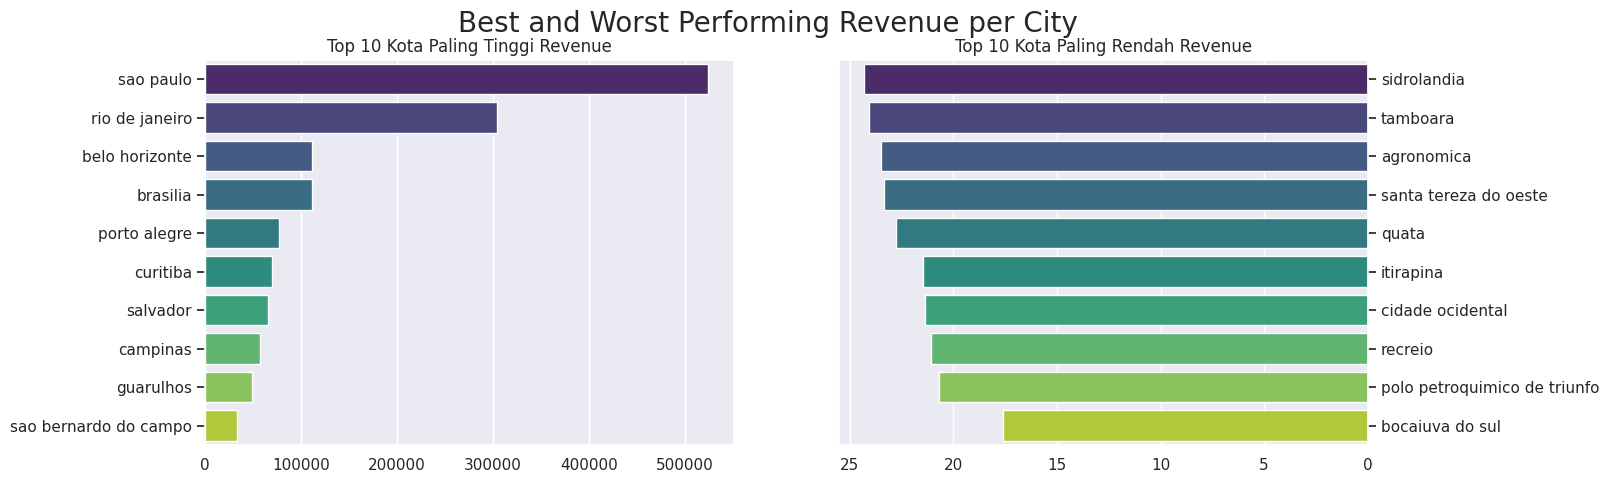

In [101]:
# menampilan produk paling laris dan terendah
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# membuat Top 10 Kota Paling Tinggi Revenue
sns.barplot(y=revenue_per_city.head(10).index, x=revenue_per_city.head(10).values, palette='viridis', ax=ax[0])
ax[0].set_title('Top 10 Kota Paling Tinggi Revenue')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].yaxis.tick_left()

# membuat Top 10 Kota Paling Rendah Revenue
sns.barplot(y=revenue_per_city.tail(10).index, x=revenue_per_city.tail(10).values, palette='viridis', ax=ax[1])
ax[1].set_title('Top 10 Kota Paling Rendah Revenue')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("Best and Worst Performing Revenue per City", fontsize=20)
plt.show()

- **Rio de Janeiro** adalah kota dengan revenue tertinggi, yaitu lebih dari **500 ribu**.
- **Bocaiuva do sul** adalah kota dengan revenue terendah, yaitu kurang dari 20.
- Terdapat perbedaan yang signifikan antara kota-kota dengan revenue tertinggi dan terendah, yaitu sekitar **50 kali lipat**.
- Kota-kota dengan revenue tertinggi cenderung berada di wilayah **tenggara Brasil**, sedangkan kota-kota dengan revenue terendah cenderung berada di wilayah **selatan dan timur** laut Brasil.
- Meningkatkan promosi dan penjualan di kota-kota dengan revenue terendah.

### Pertanyaan 9 : Rata - Rata review score atau ulasan pada product dan kategori product ?

In [102]:
# membuat rata-rata review score per produk
review_score_product = all_data.groupby('product_category_name_english')[['review_score']].mean().sort_values(by=['review_score'], ascending=False).reset_index()
print(review_score_product.head(10))
print(review_score_product.tail(10))

  product_category_name_english  review_score
0                       flowers      4.419355
1                          food      4.272366
2                    stationery      4.235823
3              small_appliances      4.230088
4               home_appliances      4.227047
5                     computers      4.225352
6                          toys      4.211108
7                         music      4.200000
8                     perfumery      4.180726
9                        drinks      4.132075
   product_category_name_english  review_score
7                          music      4.200000
8                      perfumery      4.180726
9                         drinks      4.132075
10                          auto      4.112964
11                          baby      4.076898
12                           art      4.073171
13                   electronics      4.072531
14              air_conditioning      4.051903
15                     telephony      3.995850
16                      

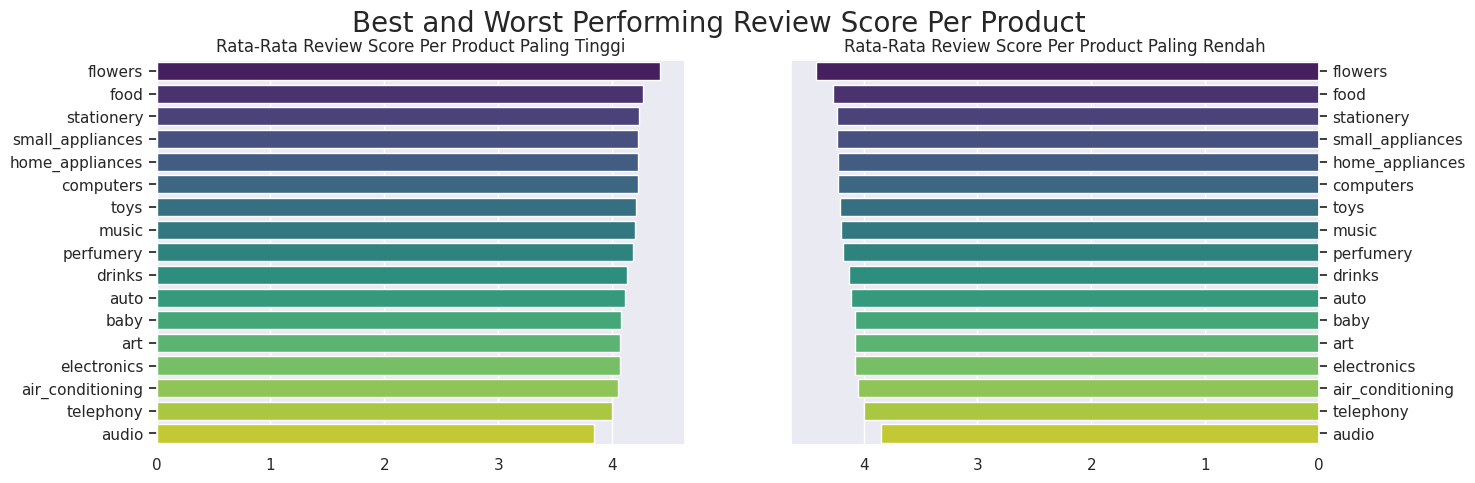

In [103]:
# visualisasi rata-rata review score per produk
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))

# membuat daftar product review score paling tinggi
sns.barplot(x=review_score_product['review_score'], y=review_score_product['product_category_name_english'],palette='viridis' ,ax=ax[0])
ax[0].set_title('Rata-Rata Review Score Per Product Paling Tinggi')
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].yaxis.tick_left()

# membuat daftar product review score paling rendah
sns.barplot(x=review_score_product['review_score'], y=review_score_product['product_category_name_english'], palette='viridis',ax=ax[1])
ax[1].set_title('Rata-Rata Review Score Per Product Paling Rendah')
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].invert_xaxis()
ax[1].yaxis.set_label_position("right")
ax[1].yaxis.tick_right()

plt.suptitle("Best and Worst Performing Review Score Per Product", fontsize=20)
plt.show()

dari barchart tersebut bisa disimpulkan bahwa product memiliki review score cukup bagus dengan rata-rata 4. terdapat product flowers yang memiliki review score mendekati sempurna 5, sedangkan audio memiliki review score terendah diatara 3 sampai 4 score.

In [104]:
# membuat rata-rata review score per category product
review_score_category = all_data.groupby('product_category')[['review_score']].mean().sort_values(by=['review_score'], ascending=False).reset_index()
review_score_category

,product_category,review_score
0,Books & Stationery,4.235823
1,Home & Garden,4.234170
2,Food & Drinks,4.212815
3,Entertainment,4.204587
4,Beauty & Health,4.180726
5,Fashion,4.076898
6,Electronics,4.062614


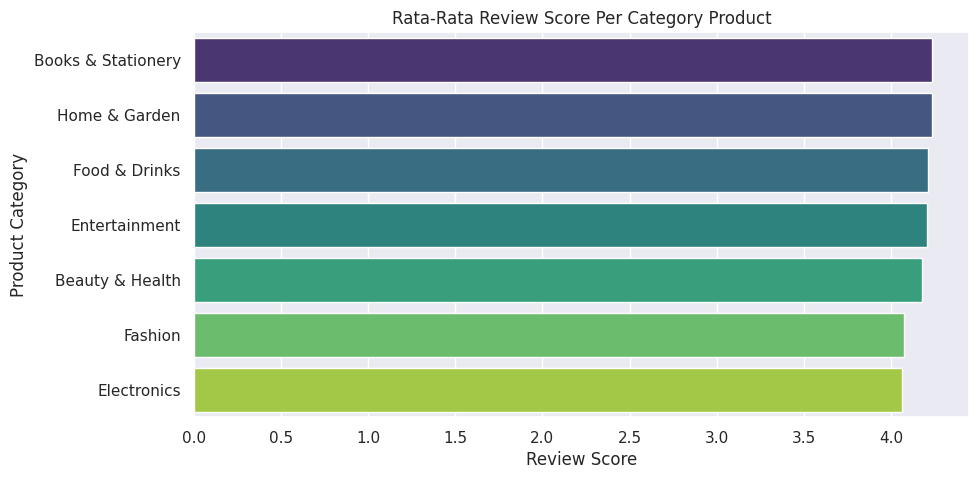

In [105]:
# visualisasi rata-rata review score per category product
plt.figure(figsize=(10, 5))
sns.barplot(x=review_score_category['review_score'], y=review_score_category['product_category'], palette='viridis')
plt.title('Rata-Rata Review Score Per Category Product')
plt.xlabel('Review Score')
plt.ylabel('Product Category')
plt.show()

dari barchart tersebut category product sangat bagus dengan rata-rata review score di atas 4. pertahankan kualitas product agar dapat meningkatkan review score dan meningkatkan penjualan.

### Pertanyaan 10 : RFM Analysis ?

In [106]:
all_data.sample(5)

,customer_id,customer_unique_id,zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,payment_sequential,payment_type,payment_installments,payment_value,seller_zip_code_prefix,seller_city,seller_state,product_category_name_english,product_category,volume,estimated_days,arrival_days,shipping_days,seller_to_kurir,kurir_to_customer,shipping_deliveryrate,year,month,day
399,1850b26764c41f4bcbb60581eb918424,c6e6c968421911e3975a6f7160a1d4b6,39800,teofilo otoni,MG,4a0401b9ac45b7c8c801fe5db8855bff,delivered,2017-02-07 13:15:29,2017-02-07 13:25:15,2017-02-08 15:53:45,2017-02-17 16:28:52,2017-03-06,30f782b1e1a220fbf8127ba92b16c2c4,3,-,Cumpriu com os requisitos e em um prazo menor ...,2017-02-19,2017-02-20 20:35:40,1,f4f67ccaece962d013a4e1d7dc3a61f7,8581055ce74af1daba164fdbd55a40de,2017-02-11 13:15:29,241.10,33.43,automotivo,52.0,603.0,1.0,7625.0,1,credit card,7,441.33,7112,guarulhos,SP,auto,Electronics,52094.0,26,10,9,On time,On time,Fast,2017,2,7
15619,cdeae9bb83dc9049458f53e9d69251ec,c198e769b7fac14f57905d5384eb9392,95500,santo antonio da patrulha,RS,e26feee700e28b2867a3e8d6f2b644b3,delivered,2017-03-02 18:00:16,2017-03-03 17:55:22,2017-03-09 15:23:31,2017-03-21 05:28:41,2017-03-31,56b21e199c92f8b589167a74704d1127,5,-,"Tudo bem explicado, pude rastrear o pedido e r...",2017-03-22,2017-03-22 17:12:09,1,a3807506fd9df35137f1b81a4e0d429a,054694fa03fe82cec4b7551487331d74,2017-03-15 17:55:22,589.00,81.85,eletroportateis,45.0,1460.0,6.0,20450.0,1,credit card,1,670.85,15840,itajobi,SP,small_appliances,Electronics,122400.0,28,18,11,On time,On time,Fast,2017,3,2
28031,e6499695100f00ee9c22a33f8f94b9c4,f24b71b23f3e91d4310102e9558809b1,12912,braganca paulista,SP,8d13ee60237028c737907273f16eda59,delivered,2018-05-26 14:29:06,2018-05-27 14:30:25,2018-05-28 12:32:00,2018-06-06 15:28:45,2018-06-29,baeef07204d0ac81b14c64e737a0acd5,4,-,-,2018-06-07,2018-06-07 19:41:29,1,e5eadf9be70a4a9fa514019542fc330a,4559697a8f7e637227c2eeaed843baff,2018-06-04 14:30:25,69.90,12.93,eletrodomesticos,48.0,543.0,2.0,1200.0,1,credit card,8,82.83,19029,presidente prudente,SP,home_appliances,Home & Garden,21000.0,33,11,9,On time,On time,Fast,2018,5,26
18168,53cf02fb89394af812a28f45c28869d6,615fc19c97dc9badadb99489624ab970,88940,timbe do sul,SC,3fe47ae1928a1f0f0dd7e456c400da7b,delivered,2018-07-18 10:54:06,2018-07-18 11:05:15,2018-07-25 08:11:00,2018-07-31 15:52:29,2018-08-16,0e31ea0c57140d04cae1be5a8ad327e9,5,Ótimo,-,2018-08-01,2018-08-02 02:09:44,1,94ccb89a02c3b16a593d8034a5acbb94,741f8c587cb4248ebc5b779a0e8e0e51,2018-07-30 11:05:15,12.99,18.23,papelaria,42.0,177.0,2.0,288.0,1,credit card,1,31.22,9110,santo andre,SP,stationery,Books & Stationery,6460.0,28,13,6,On time,On time,Fast,2018,7,18
634,a2a5465995a3a887603b8394b7dc69b5,638b3aff46974791ab154d575190c706,13348,indaiatuba,SP,7a1fc49af568078837d0bd6efc218702,delivered,2017-04-28 09:46:45,2017-04-29 02:42:48,2017-05-03 14:50:17,2017-05-22 10:07:57,2017-05-23,45b128a09a287e70dfb53a1257cb4b6f,4,-,Produto bom e entregue dentro do prazo!,2017-05-23,2017-05-25 12:21:35,1,b9518f0140a3efddd3c1ef9ad49d23d8,8581055ce74af1daba164fdbd55a40de,2017-05-08 02:42:48,98.00,16.84,automotivo,54.0,582.0,1.0,5575.0,1,boleto,1,114.84,7112,guarulhos,SP,auto,Electronics,35721.0,24,24,18,On time,On time,Normal,2017,4,28


In [107]:
rfm_df = all_data.groupby(by='customer_unique_id', as_index=False).agg({
    'order_purchase_timestamp': 'max', #mengambil tanggal terakhir pembelian
    'order_id': 'nunique', #menghitung jumlah order
    'payment_value': 'sum' #menghitung total revenue
})

rfm_df.columns = ['customer_unique_id', 'max_order_timestamp', 'frequency', 'monetary']

#menghitung kapan terakhir pelanggan melakukan pembelian (hari)
rfm_df['max_order_timestamp'] = rfm_df['max_order_timestamp'].dt.date
recent_date = all_data['order_purchase_timestamp'].dt.date.max()
rfm_df['recency'] = rfm_df['max_order_timestamp'].apply(lambda x: (recent_date - x).days)

rfm_df.drop('max_order_timestamp', axis=1, inplace=True)

rfm_df.sample(5)

,customer_unique_id,frequency,monetary,recency
14051,90ba38d381382ca06556e382dd5add10,1,82.60,410
19055,c3460ac44417c13fc9dd990ee388c3ae,1,308.60,115
6538,42eb4b252cf009833925182d6941f69d,1,57.60,303
23705,f3335c8623493fc04af3d66a5d4dfb2b,1,64.10,438
14585,95c47859b6c051088b75e1ddcd15fe38,1,26.08,316


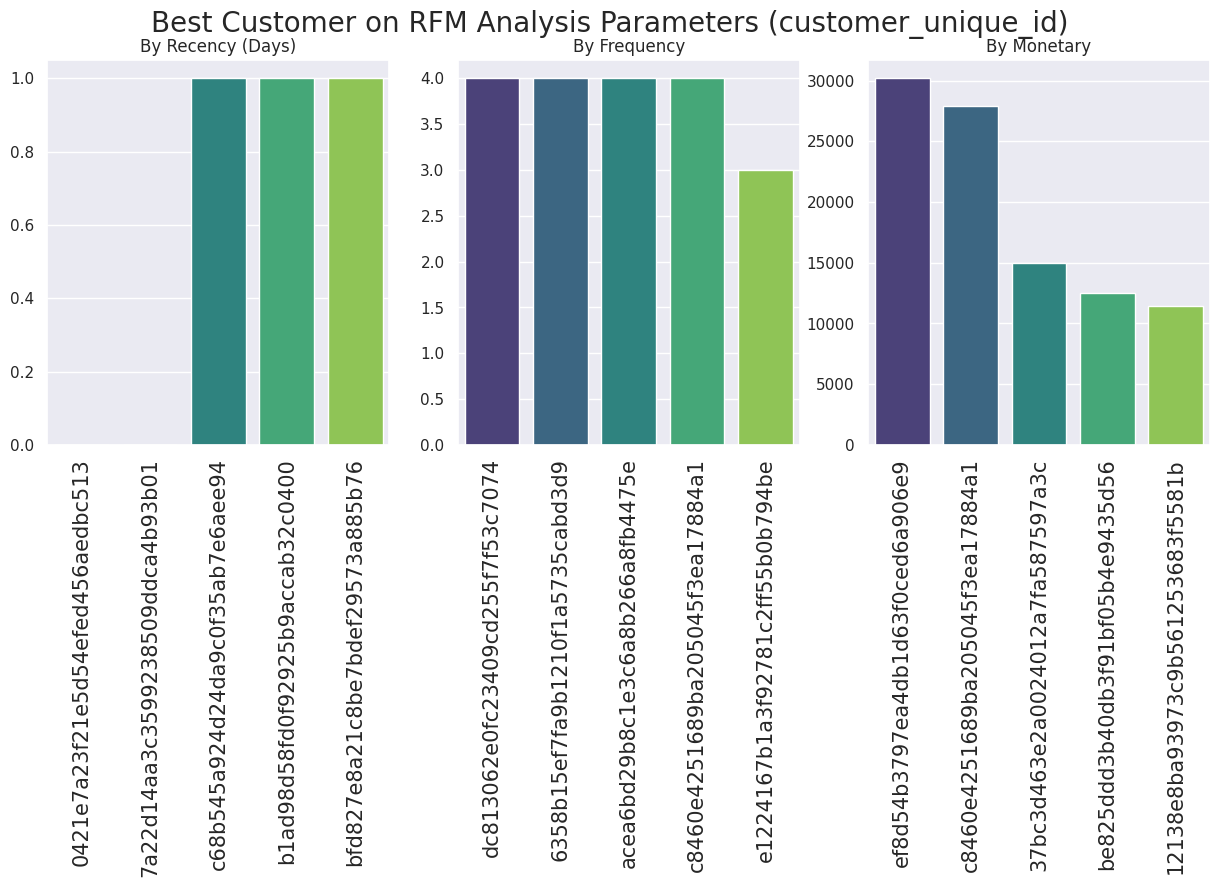

In [108]:
# visualisasi rfm analysis recency, frequency, dan monetary
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

sns.barplot(y='recency', x='customer_unique_id', data=rfm_df.sort_values('recency', ascending=True).head(5), palette='viridis', ax=ax[0])
ax[0].set_title('By Recency (Days)', loc='center', fontsize=12)
ax[0].set_xlabel(None)
ax[0].set_ylabel(None)
ax[0].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y='frequency', x='customer_unique_id', data=rfm_df.sort_values('frequency', ascending=False).head(5), palette='viridis', ax=ax[1])
ax[1].set_title('By Frequency', loc='center', fontsize=12)
ax[1].set_xlabel(None)
ax[1].set_ylabel(None)
ax[1].tick_params(axis='x', labelsize=15, rotation=90)

sns.barplot(y='monetary', x='customer_unique_id', data=rfm_df.sort_values('monetary', ascending=False).head(5), palette='viridis', ax=ax[2])
ax[2].set_title('By Monetary', loc='center', fontsize=12)
ax[2].set_xlabel(None)
ax[2].set_ylabel(None)
ax[2].tick_params(axis='x', labelsize=15, rotation=90)

plt.suptitle('Best Customer on RFM Analysis Parameters (customer_unique_id)', fontsize=20)
plt.show()

Berikut adalah kesimpulan dan rekomendasi dari hasil RFM analysis :

Kesimpulan:
- Pelanggan terbaik adalah mereka yang memiliki nilai recency, frequency, dan monetary yang tinggi. Ini berarti bahwa pelanggan ini baru-baru ini melakukan pembelian, melakukan pembelian secara sering, dan menghabiskan banyak uang.
- Berdasarkan grafik batang yang ditampilkan, pelanggan dengan ID unik  adalah lima pelanggan terbaik berdasarkan parameter RFM.
- Pelanggan dengan ID unik yang berakhiran (b76, 400, e94) memiliki nilai **recency** tinggi.
- Pelanggan dengan ID unik yang berakhiran (074, 3d9, 75e, 4a1, 4be) memiliki  **frequency** transaksi tinggi lebih dari 3 transaksi.
- Pelanggan dengan ID unik yang berakhiran (6e9, 4a1, a3c, d56, 81b) memiliki kontribusi dalam revenue atau **monetary** tinggi lebih dari (5000).

Rekomendasi:

- Bisnis harus fokus pada mempertahankan pelanggan terbaik ini dan menawarkan mereka promosi dan diskon yang disesuaikan dengan kebutuhan dan preferensi mereka untuk mendorong mereka terus melakukan pembelian.
- Bisnis juga harus mencoba meningkatkan nilai recency, frequency, dan monetary dari pelanggan lain yang memiliki nilai rendah atau sedang pada salah satu atau lebih parameter tersebut.
- Bisnis dapat melakukan segmentasi pelanggan berdasarkan parameter RFM dan menentukan strategi pemasaran yang sesuai untuk setiap segmen. Misalnya, bisnis dapat memberikan insentif loyalitas kepada pelanggan yang memiliki nilai frequency tinggi, tetapi nilai recency rendah.

## Conclusion

- Setiap tahun pendapatan atau revenue perusahaan meningkat, menunjukan tren yang sangat positif. tahun 2018 adalah revenue tertinggi yaitu sebesar  **2300648.55**.
- Sao Paulo memiliki jumlah customer yang jauh lebih banyak daripada kota-kota lainnya, dengan **total 3757 customer** yang bertansaksi.
- Sao Paulo memiliki jumlah order yang paling tinggi di antara semua kota seller. Ini menunjukkan bahwa **Sao Paulo** adalah pusat aktivitas penjualan online yang signifikan di Brasil, dengan jumlah penjual dan transaksi yang tinggi.
- pertumbuhan order atau trasaksi tinggi pada awal quarter seperti q1 dan q2 akan tetapi mengalami penurunan pada quarter q3 dan q4 dan penurunan sangat tinggi.
- pengiriman pesanan sebagaian besar cukup cepat dan rating kepuasan pelanggan juga cukup bagus sekitar 4 - 5 bintang.
- product paling diminati customer adalah kategori Electronic sementara product paling sedikit ,imat customer adalah food & drink.
- metode pembayaran paling tinggi adalah credit card sekirar 74%
- **Rio de Janeiro** adalah kota dengan revenue tertinggi **Bocaiuva do sul** adalah kota dengan revenue terendah.
- sebagian besar product memiliki rating skor cukup bagus.
- Berdasarkan analisis menggunakan rfm setidaknya ada bebera customer atau pelanggan yang berkontribusi ke monetary, frequency dan recency perusahaan.

In [111]:
# menyimpan dataset ke dalam file CSV
all_data.to_csv('main_data.csv', index=False)